In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
import matplotlib.patches as mpatches

file_path = r'D:\Research\MarmoCo2\Data\ToProcess_Hab\analysis\2024-11-02_butcounts.xlsx'

# Read the data from the Excel file
df = pd.read_excel(file_path)

# Filter for 'hab1' and 'hab2' experiments
df_filtered = df

df_filtered = df_filtered.copy()

df_filtered['fraction_correct'] = df_filtered['correct'] / (df_filtered['correct'] + df_filtered['outside'])
df_filtered['total'] = df_filtered['correct'] + df_filtered['outside']


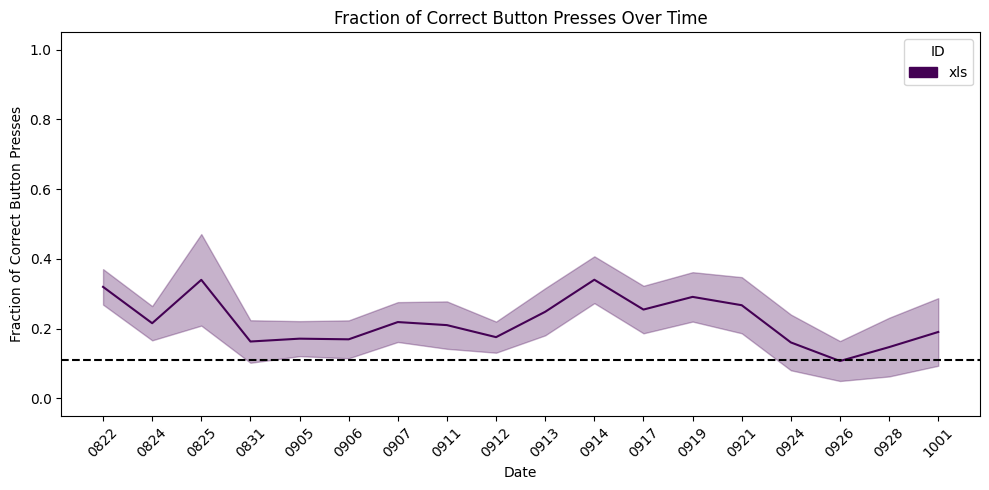

In [12]:

#算置信区间并画图
# Convert 'date' to string to treat it as a categorical variable
df_filtered['date'] = df_filtered['date'].astype(str)

# Calculate the number of correct and total button presses for each day and ID
df_daily = df_filtered.groupby(['date', 'id']).agg(
    correct=('correct', 'sum'), 
    total=('total', 'sum'),
    fraction_correct=('fraction_correct', 'mean')  # calculate the mean fraction_correct for each day and ID
).reset_index()

# Sort 'date' column in ascending order
df_daily['date'] = df_daily['date'].astype(int).apply(lambda x: f"{x:04d}")
df_daily = df_daily.sort_values('date')
df_daily['date'] = df_daily['date'].astype(str)

# Calculate the confidence interval for the proportion of correct button presses each day and ID
df_daily['ci_lower'], df_daily['ci_upper'] = proportion_confint(df_daily['correct'], df_daily['total'], alpha=0.05)
# Define the color palette
ids = df_daily['id'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(ids)))
palette = dict(zip(ids, colors))

# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Then, when plotting, specify this order
unique_dates = df_daily['date'].unique() # Define the variable "unique_dates" by extracting unique dates from the 'date' column of df_daily
sns.lineplot(x='date', y='fraction_correct', hue='id', data=df_daily, palette=palette, hue_order=ids, sort=False)

plt.xticks(ticks=range(len(unique_dates)), labels=unique_dates, rotation=90)

for i, id in enumerate(ids):
    df_id = df_daily[df_daily['id'] == id]
    df_id = df_id.sort_values('date')
    #ax.errorbar(df_id['date'], df_id['fraction_correct'], yerr=[df_id['fraction_correct'] - df_id['ci_lower'], df_id['ci_upper'] - df_id['fraction_correct']], color=palette[id], label=id)
    ax.fill_between(df_id['date'], df_id['ci_lower'], df_id['ci_upper'], color=palette[id], alpha=0.3)

ax.set_title('Fraction of Correct Button Presses Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Fraction of Correct Button Presses')
ax.set_ylim([-0.05, 1.05])

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# # Add a vertical line at the midpoint between '321' and '327'
# pos_321 = list(df_filtered['date'].unique()).index('907')
# pos_327 = list(df_filtered['date'].unique()).index('911')
# midpoint = (pos_321 + pos_327) / 2
# plt.axvline(x=midpoint, color='gray', linestyle='--')

# Add a horizontal line at y=0.111
plt.axhline(y=0.111, color='black', linestyle='--')

# Create a custom legend
patches = [mpatches.Patch(color=palette[id], label=id) for id in ids]
plt.legend(handles=patches, title='ID')

# Save and show the plot
plt.tight_layout()
plt.savefig(file_path.replace('.xlsx', '_fraction.png'))
plt.show()



In [13]:

# from scipy.stats import ttest_1samp

# from scipy.stats import chisquare
# from statsmodels.stats.proportion import proportions_ztest

# Get unique IDs and experiments
# ids = df_filtered['id'].unique()
# experiments = df_filtered['experiment'].unique()


# #单样本比例检验  
# # Perform single sample proportion test for each ID and experiment
# for id in ids:
#     for experiment in experiments:
#         data = df_filtered[(df_filtered['id'] == id) & (df_filtered['experiment'] == experiment)]
#         correct = data['correct'].sum()
#         total = correct + data['outside'].sum()
#         stat, p_val = proportions_ztest(correct, total, value=1/9)  # assuming null hypothesis proportion is 0.5
#         print(f"{id}, experiment {experiment}, {stat},{p_val},{correct},{total}")

#初始日期单样本t检验
# Define the dates of interest
# dates_of_interest = ['313','314','327']

# # Perform single sample proportion test for each ID and date
# for id in ids:
#     for date in dates_of_interest:
#         data = df_filtered[(df_filtered['id'] == id) & (df_filtered['date'].astype(str).isin([date]))]
#         correct = data['correct'].sum()
#         total = correct + data['outside'].sum()
#         stat, p_val = proportions_ztest(correct, total, value=1/9)  # assuming null hypothesis proportion is 0.5
#         print(f"{id}, {date}, z = {stat}, p = {p_val},{correct},{total}")

# # Get unique IDs, experiments, and dates
# ids = df_filtered['id'].unique()
# experiments = df_filtered['experiment'].unique()
# dates = df_filtered['date'].unique()

# # Perform chi-square test for each ID, experiment, and date
# for id in ids:
#     for experiment in experiments:
#         for date in dates:
#             data = df_filtered[(df_filtered['id'] == id) & (df_filtered['experiment'] == experiment) & (df_filtered['date'] == date)]
#             if not data.empty:  # Check if there is data for this combination
#                 correct = data['correct'].sum()
#                 total = correct + data['outside'].sum()
#                 observed = [correct, total - correct]
#                 expected = [total / 9, total * 8 / 9]
#                 chi2, p_val = chisquare(observed, expected)
#                 print(f"For ID {id}, experiment {experiment}, date {date}, chi-square: {chi2}, p-value: {p_val}")



In [14]:

#卡方检验
# Perform chi-square test for each ID and experiment
# for id in ids:
#     for experiment in experiments:
#         data = df_filtered[(df_filtered['id'] == id) & (df_filtered['experiment'] == experiment)]
#         correct = data['correct'].sum()
#         total = correct + data['outside'].sum()
#         observed = [correct, total - correct]
#         expected = [total / 9, total * 8 / 9]
#         chi2, p_val = chisquare(observed, expected)
#         print(f"For ID {id}, experiment {experiment}, chi-square: {chi2}, p-value: {p_val}")

# from statsmodels.stats.proportion import proportions_ztest
